In [1]:
### COMPUTATIONAL PHYSICS
### Homework 3, Problem 1: 2D Curve Fitting

# Hubble’s law is the relationship between the recessional velocity of galaxy calculated with Doppler Shift and its distance from us, determined using a variety of methods. It is given the form v = Hod where v is the velocity in km s−1, d is the distance in Mpc and Ho is Hubble’s constant. You can assume that at a distance of zero, the recessional velocity is also zero. With your exam you have been given a data file which contains distances in Mpc (millions of parsecs, where 1 parsec = 3.26 light years) and velocities in km s−1 for a set of galaxies.
### Name:  Carson Huey-You

In [2]:
### 1. IMPORT PACKAGES

import math as math
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit


In [3]:
### 2. LOAD DATA

data = np.genfromtxt("galaxies.dat")

x_data = data[:,0] #distance
y_data = data[:,1] #velocity
x_err = data[:,2] #distance error
y_err = data[:,3] #velocity error


In [4]:
### 3. DEFINE FUNCTIONS

# Define a Generating Function, which we will use to create the noisy data.

def guess_func(x, a):
    return a*x


In [5]:
### 3. DEFINE FUNCTIONS

# Iterate through a monte-carlo fitting scheme N_mc times, 
# and return value_count values.

def montecarlo_fit(guess_func, x_data, y_data, x_err, y_err, N_mc, value_count):
    
    #Get number of data points to fit to.
    N = len(x_data)
    
    #Define array to save optimized values.
    saved_vals = np.zeros(shape=(value_count, N_mc))
    
    #Populate 'error boxes'.
    for i in range(0, N_mc):
        
        x_mc = x_data + (np.random.random(N) - 0.5)*2.0*x_err
        y_mc = y_data + (np.random.random(N) - 0.5)*2.0*y_err
        
        popt, pcov = curve_fit(guess_func, x_mc, y_mc)
        
        #Save each popt in an array.
        for j in range(0, value_count):
            
            saved_vals[j][i] = popt[j]
            
    #Derive median & stdev values for a, b, and c.
    guess_a = np.median(saved_vals[0])
    
    stdev_a = np.std(saved_vals[0])
    
    return np.array([[guess_a], 
                     [stdev_a]])



In [6]:
### 3. DEFINE FUNCTIONS

# Add multiple elements to graphs, specifically:
# - Scattered Data with Error-Bars
# - Best Fit from Monte-Carlo
# - Filled Area ±K Standard Deviations from the Best Fit

def plot_stuff(guess_func, x_data, y_data, x_err, y_err, N_mc, value_count):
    
    #Scattered Data with Error-Bars.
    plt.errorbar(x_data, y_data, xerr=x_err, yerr=y_err, fmt='o', markersize=2, alpha=0.5, label="Noisy Data to Fit")
    
    #Best Fit from Monte-Carlo.
    value_array = montecarlo_fit(guess_func, x_data, y_data, x_err, y_err, N_mc, value_count)
    
    guess_a = value_array[0][0]
    stdev_a = value_array[1][0]
    
    fit_label = f"\nBest Fit from Monte-Carlo:\n"
    fit_a = f"a={guess_a}, " + "$\sigma_{a}=$" + f"{stdev_a}"
    
    ordered_x = np.sort(x_data)
    
    plt.plot(ordered_x, guess_func(ordered_x, guess_a), color='yellow', label = fit_label + fit_a)
    
    #Filled Area ±K Standard Deviations from the Best Fit.
    #Change how many standard deviations to fill with stretch_fill.
    stretch = 1
    
    top_fill = guess_func(ordered_x, guess_a + stretch*stdev_a)
    bot_fill = guess_func(ordered_x, guess_a - stretch*stdev_a)
    
    plt.fill_between(ordered_x, top_fill, bot_fill, color='green', alpha=0.75, label="One Standard Deviation ($\pm$)")



<ErrorbarContainer object of 3 artists>

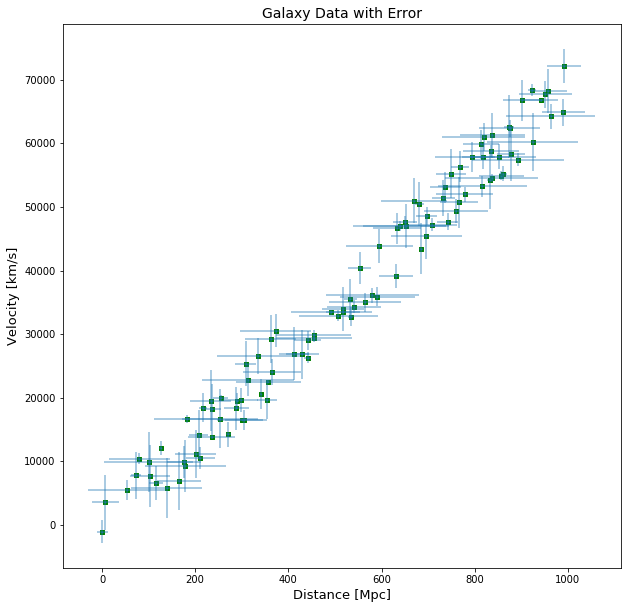

In [7]:
### 4. TEST PLOT, TO SHOW DATA & ERRORS

fig = plt.figure(figsize=(10,10))

plot_title = "Galaxy Data with Error"
plt.title(plot_title, size=14)

plt.xlabel("Distance [Mpc]", size=13)
plt.ylabel("Velocity [km/s]", size=13)

plt.scatter(x_data, y_data, s=10, color='green', marker='s')
plt.errorbar(x_data, y_data, xerr=x_err, yerr=y_err, fmt='o', markersize=1, alpha=0.5)


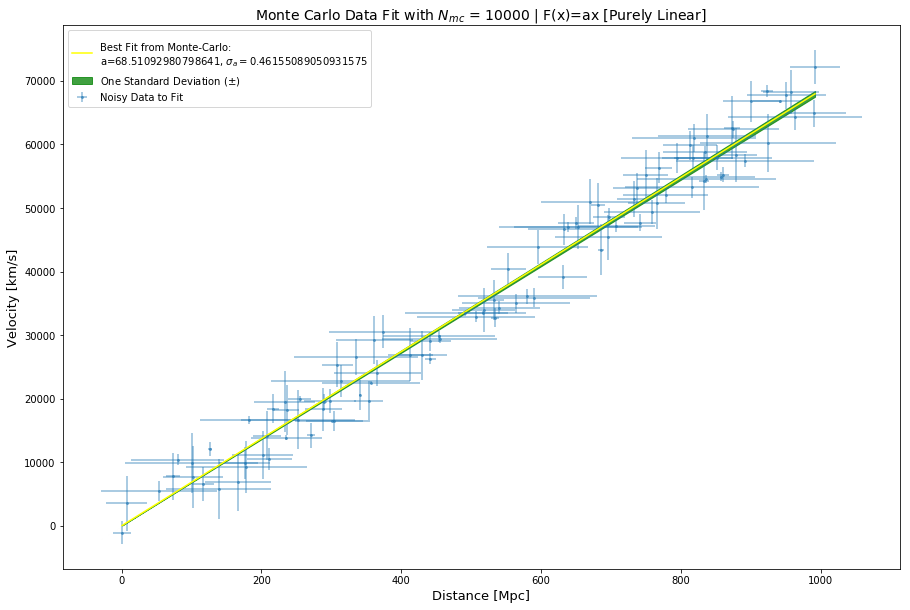

In [8]:
### 5. FIT & PLOT DATA

N_mc = 10000

fig = plt.figure(figsize=(15,10))

plot_title = "Monte Carlo Data Fit with $N_{mc}$ = " + f"{N_mc} | " + f"F(x)=ax [Purely Linear]"
plt.title(plot_title, size=14)

plt.xlabel("Distance [Mpc]", size=13)
plt.ylabel("Velocity [km/s]", size=13)

plot_stuff(guess_func, x_data, y_data, x_err, y_err, N_mc, 1)

plt.legend()


In [9]:
### 6. FIND HUBBLE CONSTANT AND AGE OF UNIVERSE

hubble_values = montecarlo_fit(guess_func, x_data, y_data, x_err, y_err, N_mc, 1)

H_const = hubble_values[0][0]
H_stdev = hubble_values[1][0]

univ_age = 1/H_const

# As T = 1/H, we find that dT/dH = -1/(H^2).
# Therefore, dT = -(1/H^2)*dH

error_age = (1/(H_const)**2)*H_stdev 

print(f"The Hubble's Constant value was found to be {H_const} ± {H_stdev} [(km/s)/Mpc].")

##Multiply 978.5 [Mpc/(km/s) -> Gyr]
print(f"Therefore, the universe's age should be {univ_age*978.5} ± {error_age*978.5} [Gyr]")


The Hubble's Constant value was found to be 68.51507122592817 ± 0.46116271541137505 [(km/s)/Mpc].
Therefore, the universe's age should be 14.281529340798615 ± 0.09612642493375284 [Gyr]


In [10]:
### 7. ANSWER FOR PART 1B.

# The given value of 13.5 Gyr shows roughly 0.75 Gyr of error,
# between the oldest known stellar populations and the derived 
# age of the Universe.  

# Although the expected value is outside of the errorbars, with 
# slightly better constraints or more data, the generated value 
# of Hubble's constant is consistent.
